In [1]:
import pandas as pd
import numpy as np
from numpy import transpose as t
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.random import randn

In [2]:
class NaturalCubicSpline:
    
    def __init__(self,knot):
        self.knot = knot
        
    def relu(self,x):
        if type(x) == int:
            if x>0:
                return x
            else:
                return 0
        else: return np.array([i if i>0 else 0 for i in x])
    
    def D(self,X,k,K):
        d_k = (NaturalCubicSpline.relu(self,(X-self.knot_list[k-1])**3)-NaturalCubicSpline.relu(self,(X-self.knot_list[K-1])**3))/(self.knot_list[K-1]-self.knot_list[k-1])
        d_K = (NaturalCubicSpline.relu(self,(X-self.knot_list[K-2])**3)-NaturalCubicSpline.relu(self,(X-self.knot_list[K-1])**3))/(self.knot_list[K-1]-self.knot_list[K-2])
        return d_k - d_K
    
    def fit(self,x):
        n = x.shape[0]
        self.knot_list = [math.ceil(x.min()+(x.max()-x.min())/(self.knot+1)*i) for i in range(1,self.knot+1)]
        design_M = [np.ones(n)]
        design_M.append(np.array(x))
        if self.knot >= 3:
            for k in range(1,self.knot-1):
                design_M.append(NaturalCubicSpline.D(self,x,k,self.knot))
        self.basis = design_M
        self.design_M =  t(design_M)
    
    def predict(self,x,y):
        self.prediction = self.design_M@inv(t(self.design_M)@self.design_M)@t(self.design_M)@y
        self.coef = inv(t(self.design_M)@self.design_M)@t(self.design_M)@y
        return self.prediction
    
    def get_function(self,x):
        f = self.coef[0] + self.coef[1]*x
        if self.knot >=3:
            for k in range(1,self.knot-1):
                f += self.coef[k+1]*NaturalCubicSpline.D(self,x,k,self.knot)
        return f
    
    def draw_plot(self,x,y):
        x1 = np.linspace(min(x),max(x))
        plt.scatter(x,y)
        plt.plot(x1,NaturalCubicSpline.get_function(self,x1))
        for i in self.knot_list:
            plt.axvline(i,color='gray', linestyle='--', linewidth='1')

Example

In [3]:
data = pd.read_csv("data/height-weight.csv")
data.head()
x = data['Weight']
y = data['Height']

In [4]:
Nc = NaturalCubicSpline(5)

In [5]:
Nc.fit(x)

In [6]:
pred = Nc.predict(x,y)

In [7]:
pred

array([1.47517883, 1.49333174, 1.52046136, 1.54759099, 1.57464933,
       1.60134952, 1.62667555, 1.65035744, 1.67995923, 1.70111813,
       1.72820729, 1.75334008, 1.77590146, 1.80261521, 1.82926384])

In [8]:
Nc.get_function(2)

0.4735770276713327

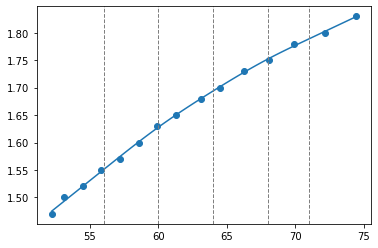

In [9]:
Nc.draw_plot(x,y)

Example 2

In [10]:
df = pd.read_csv('data/toluca_company_dataset.csv')

In [11]:
x=df['Lot_size']
y=df['Work_hours']

In [12]:
Nc = NaturalCubicSpline(4)

In [13]:
Nc.fit(x)

In [14]:
pred = Nc.predict(x,y)

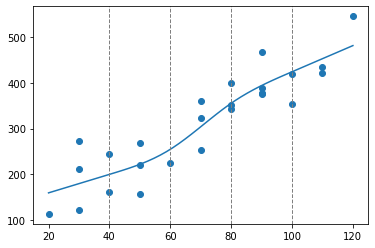

In [15]:
Nc.draw_plot(x,y)